### Importing Libraries

In [1]:
import numpy as np                                # for arrays
import pandas as pd                               # for reading and writing datasets  
import matplotlib.pyplot as plt                   # for plotting
import seaborn as sns                             # for visualization
%matplotlib inline

### Reading Datasets

In [2]:
df_train = pd.read_csv('train_s3TEQDk.csv')       # reading train dataset
df_train.head()                                   # printing first 5 rows 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
df_test = pd.read_csv('test_mSzZ8RL.csv')         # reading test dataset
df_test.head()                                    # printing first 5 rows 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [4]:
df_train.info()     # checking dtype, rangeindex, columns and nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
df_train.isnull().sum()     # counting nan values

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
df_test.info()            # checking dtype, rangeindex, columns and nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [7]:
df_test.isnull().sum()     # counting nan values

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

### Data Analysis and Data Cleaning

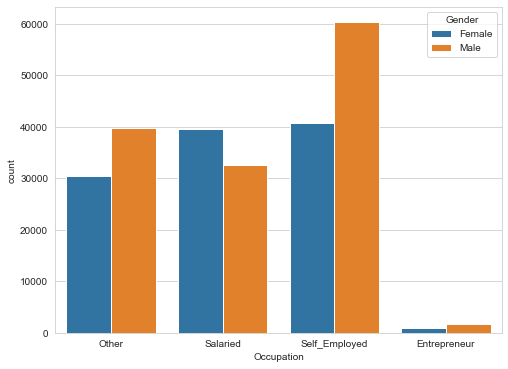

Gender  Occupation   
Female  Self_Employed    40622
        Salaried         39496
        Other            30423
        Entrepreneur       987
Male    Self_Employed    60264
        Other            39750
        Salaried         32503
        Entrepreneur      1680
Name: Occupation, dtype: int64

In [8]:
# analysing occupation by gender

plt.figure(figsize=(8,6))
sns.set_style(style = 'whitegrid')
sns.countplot(x='Occupation', hue='Gender', data=df_train)
plt.show()
df_train.groupby('Gender').Occupation.value_counts()

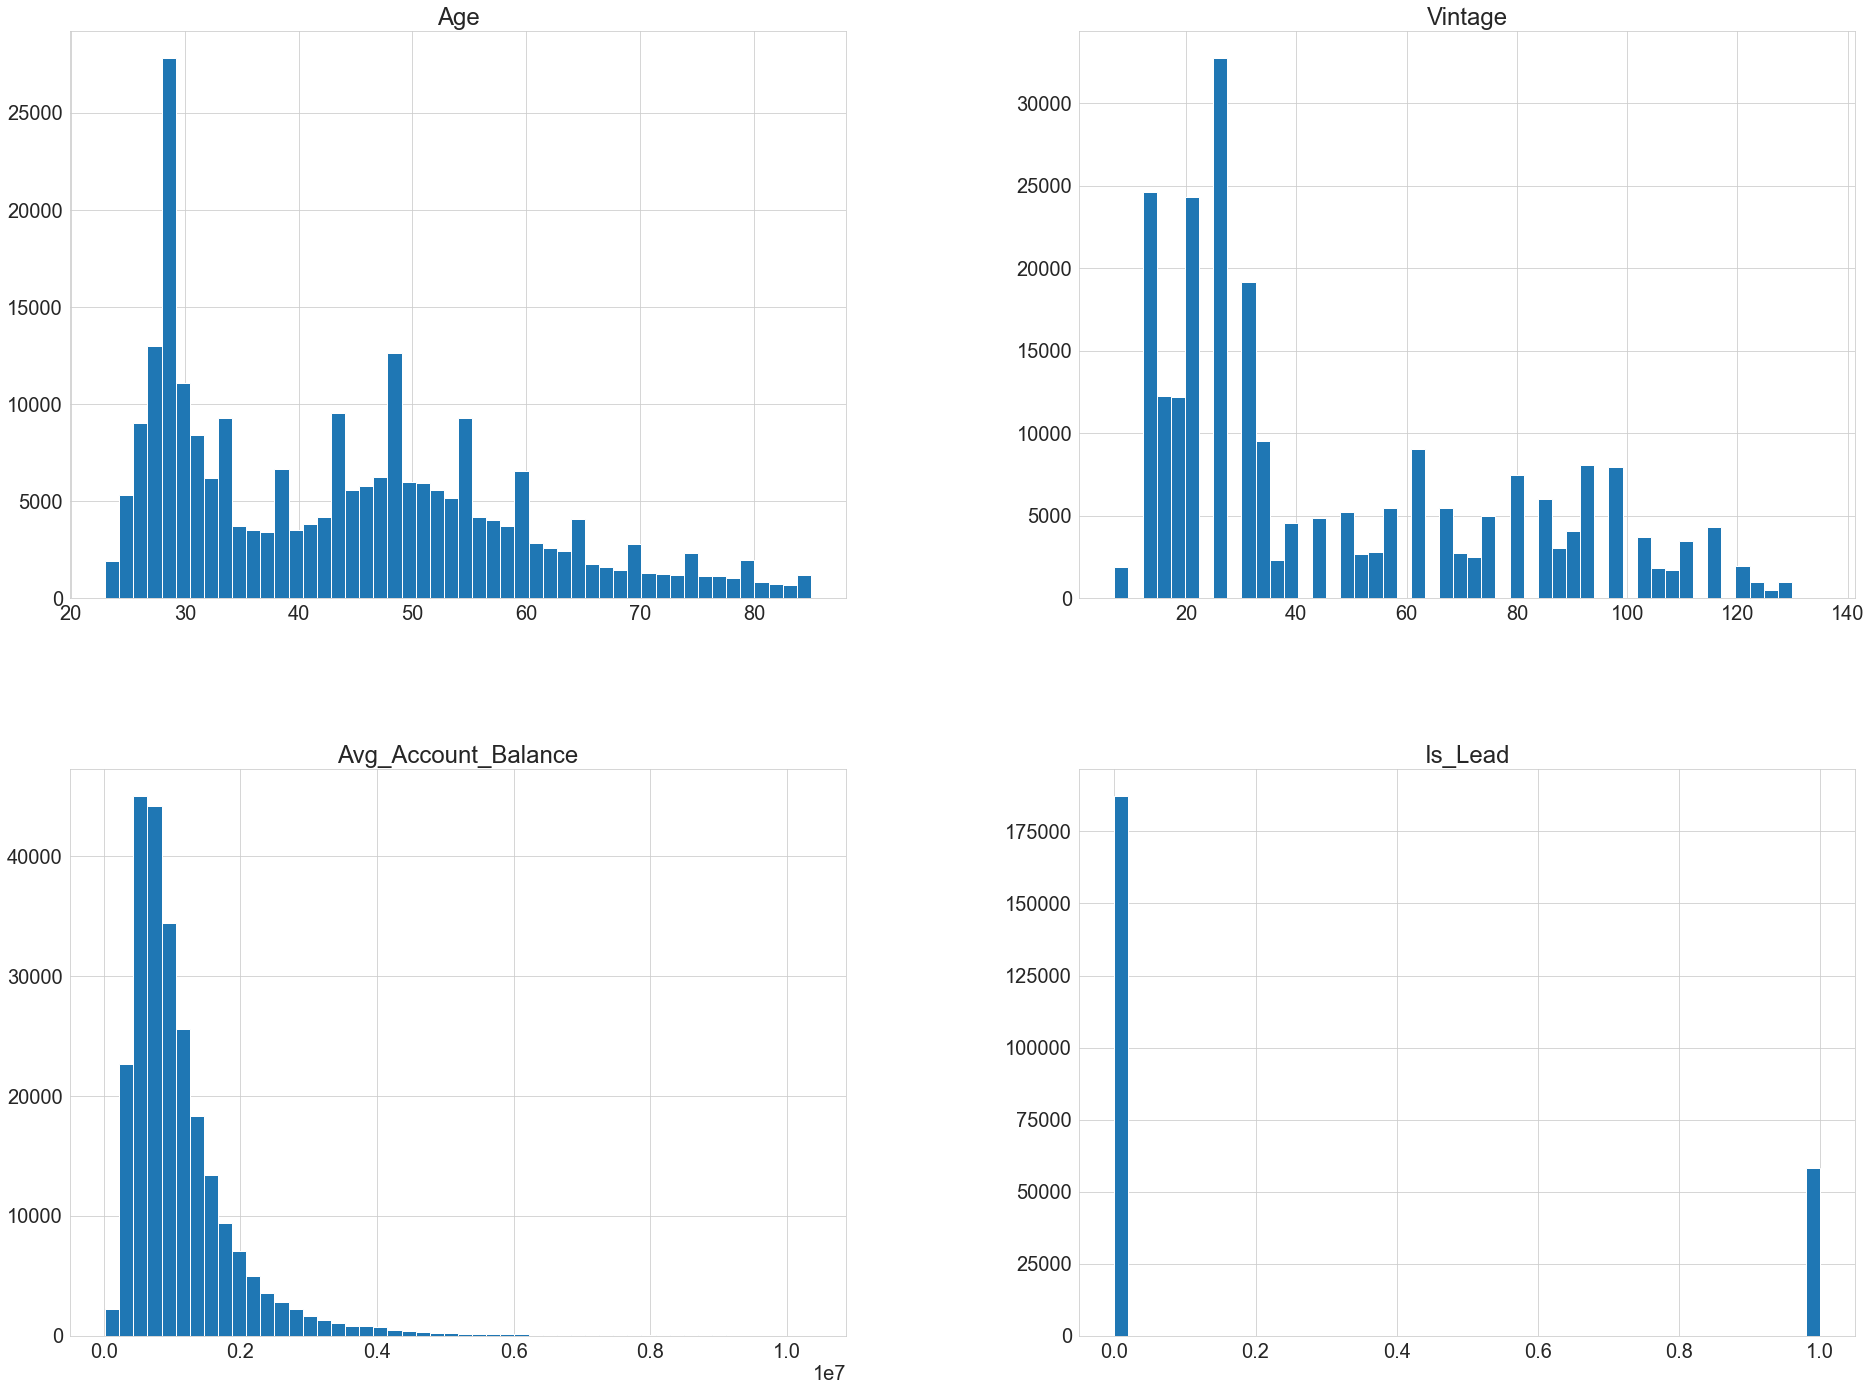

In [9]:
# analysing distribution of data

plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
df_train.hist(bins = 50, figsize = (32, 24))  
plt.show()

Conclusion: As we can see the distribution of data is right-skewed.

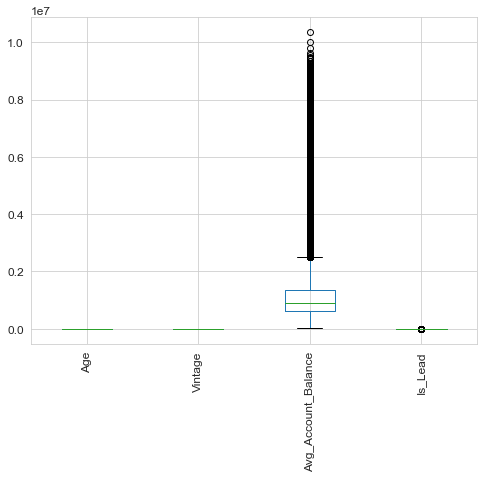

In [10]:
### finding outliers in train dataset

plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
df_train.boxplot(figsize = (8,6))
plt.xticks(rotation='vertical')  # rotating xtick label
plt.show()

In [11]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


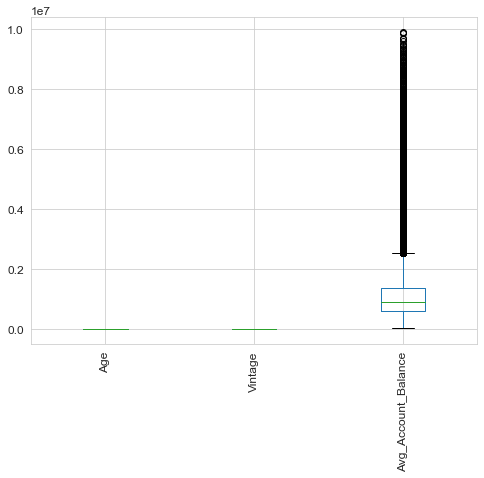

In [12]:
### finding outliers in test dataset

plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
df_test.boxplot(figsize = (8,6))
plt.xticks(rotation='vertical')  # rotating xtick label
plt.show()

In [13]:
df_test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [14]:
# defining a function for removing outliers

def remove_outliers(data):
    arr = []
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3 - q1
    minm = q1 - (1.5*iqr)
    maxm = q3 + (1.5*iqr)
    
    for i in list(data):
        if i < minm:
            i = minm
            arr.append(i)
        elif i > maxm:
            i = maxm
            arr.append(i)
        else:
            arr.append(i)
    #print(max(arr))
    return arr

In [15]:
# removing outliers

df_train['Avg_Account_Balance'] = remove_outliers(df_train['Avg_Account_Balance'])
df_test['Avg_Account_Balance'] = remove_outliers(df_test['Avg_Account_Balance'])

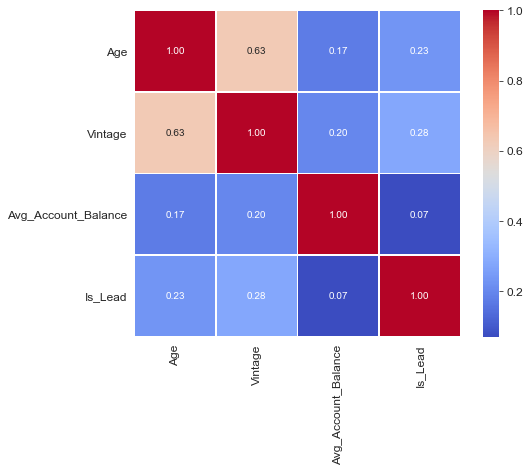

In [16]:
# finding correlation of all numerical features

plt.figure(figsize=(8,6))
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
sns.heatmap(df_train.corr(), annot=True, fmt='.2f', linewidths=0.5, square=True, cmap='coolwarm')
plt.xticks(rotation='vertical')
plt.show()

In [17]:
# replacing NAN to 'Missing' as we don't want to lose data

df_train = df_train.fillna('Missing')  
df_test = df_test.fillna('Missing')

In [18]:
# removing strings from feature as we can use it for model building

df_train['Region_Code'] = df_train['Region_Code'].str.replace(r'\D', '').astype(int)
df_test['Region_Code'] = df_test['Region_Code'].str.replace(r'\D', '').astype(int)

In [19]:
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,268,Other,X3,43,No,1045696.0,No,0
1,IDD62UNG,Female,30,277,Salaried,X1,32,No,581988.0,No,0
2,HD3DSEMC,Female,56,268,Self_Employed,X3,26,No,1484315.0,Yes,0
3,BF3NC7KV,Male,34,270,Salaried,X1,19,No,470454.0,No,0
4,TEASRWXV,Female,30,282,Salaried,X1,33,No,886787.0,No,0


In [20]:
df_train['Channel_Code'].value_counts()   # finding number of categories in feature

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [21]:
# one_hot_encoding categorical features for train dataset

Gender = pd.get_dummies(df_train['Gender'], drop_first=True)
Occupation = pd.get_dummies(df_train['Occupation'], drop_first=True)
Channel_Code = pd.get_dummies(df_train['Channel_Code'], drop_first=True)
Credit_Product = pd.get_dummies(df_train['Credit_Product'], drop_first=True)

In [22]:
# here we are manually replacing the values because we don't want the columns name be same
# as one of the feature has already Yes/No values

df_train['Is_Active'].replace('Yes', 1, inplace=True)
df_train['Is_Active'].replace('No', 0, inplace=True)

In [23]:
# concating one_hot_encoded features in the dataset and removing the previous features of same name

df_train = pd.concat([df_train, Gender, Occupation, Channel_Code, Credit_Product],axis=1)
df_train = df_train.drop(['ID', 'Gender', 'Occupation', 'Channel_Code', 'Credit_Product'], axis=1)
df_train.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Male,Other,Salaried,Self_Employed,X2,X3,X4,No,Yes
0,73,268,43,1045696.0,0,0,0,1,0,0,0,1,0,1,0
1,30,277,32,581988.0,0,0,0,0,1,0,0,0,0,1,0
2,56,268,26,1484315.0,1,0,0,0,0,1,0,1,0,1,0
3,34,270,19,470454.0,0,0,1,0,1,0,0,0,0,1,0
4,30,282,33,886787.0,0,0,0,0,1,0,0,0,0,1,0


In [24]:
# one_hot_encoding categorical features for test dataset

Gender = pd.get_dummies(df_test['Gender'], drop_first=True)
Occupation = pd.get_dummies(df_test['Occupation'], drop_first=True)
Channel_Code = pd.get_dummies(df_test['Channel_Code'], drop_first=True)
Credit_Product = pd.get_dummies(df_test['Credit_Product'], drop_first=True)

In [25]:
# here we are manually replacing the values because we don't want the columns name be same
# as one of the feature has already Yes/No values

df_test['Is_Active'].replace('Yes', 1, inplace=True)
df_test['Is_Active'].replace('No', 0, inplace=True)

In [26]:
# concating one_hot_encoded features in the dataset and removing the previous features of same name

df_test = pd.concat([df_test, Gender, Occupation, Channel_Code, Credit_Product],axis=1)
df_test = df_test.drop(['Gender', 'Occupation', 'Channel_Code', 'Credit_Product'], axis=1)
df_test.head()

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Male,Other,Salaried,Self_Employed,X2,X3,X4,No,Yes
0,VBENBARO,29,254,25,742366.0,0,1,1,0,0,0,0,0,0,1
1,CCMEWNKY,43,268,49,925537.0,0,1,1,0,0,1,0,0,0,0
2,VK3KGA9M,31,270,14,215949.0,0,1,0,1,0,0,0,0,1,0
3,TT8RPZVC,29,272,33,868070.0,0,1,1,0,0,0,0,0,1,0
4,SHQZEYTZ,29,270,19,657087.0,0,0,1,0,0,0,0,0,1,0


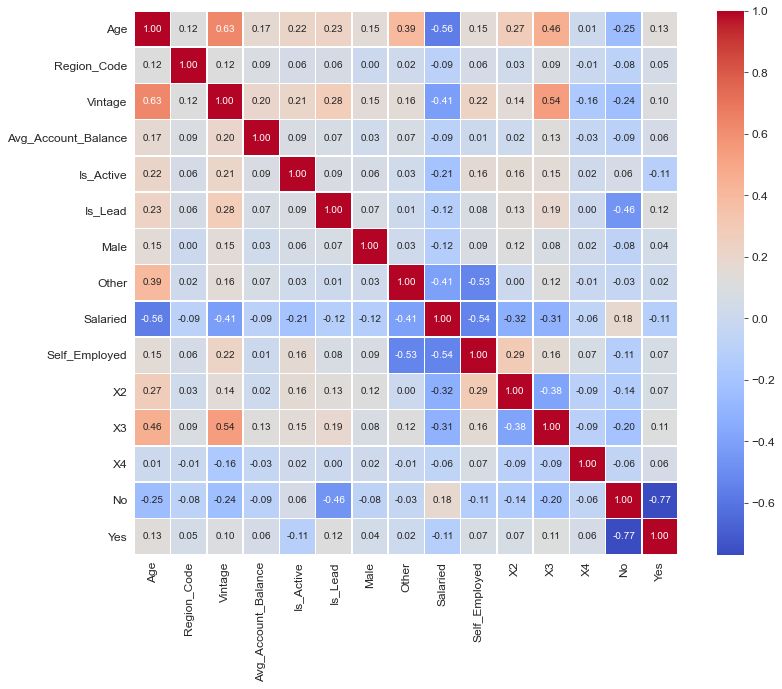

In [27]:
# again calculating correlation of features to find importance of features after one_hot_encoding 

plt.figure(figsize=(14,10))
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
sns.heatmap(df_train.corr(), annot=True, fmt='.2f', linewidths=0.5, square=True, cmap='coolwarm')
plt.show()

As we can see that even after encoding categorical features there is not that much change in the significance of features.

In [28]:
df_train['Is_Lead'].value_counts()    # finding if the target variables are balanced or not

0    187437
1     58288
Name: Is_Lead, dtype: int64

Since, the difference is too great it is an imbalanced problem. So, we will use oversampling to balance the target values.

### Resampling imbalanced data

In [29]:
# importing imblearn module for over sampling the target variables

from imblearn.over_sampling import RandomOverSampler

In [30]:
df_train.shape

(245725, 15)

In [31]:
# assigning independent variables and dependent variable into X and y

X = df_train.drop(['Is_Lead'], axis=1)
y = df_train['Is_Lead']

In [32]:
X.shape, y.shape

((245725, 14), (245725,))

In [33]:
# resampling the data by over sampling the minority data

ros = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = ros.fit_resample(X, y)
print(X_over.shape)
print(y_over.shape)

(374874, 14)
(374874,)


### Train-Test Split

In [34]:
# importing train-test split to split the training dataset

from sklearn.model_selection import train_test_split

In [35]:
# splitting training dataset for model building

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, train_size=0.7, random_state=20 )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(262411, 14)
(112463, 14)
(262411,)
(112463,)


### Model Building

In [36]:
# importing models that we are going to use 

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [37]:
# xgbclassifier

xgb = XGBClassifier(use_label_encoder=False, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
roc_xgb = roc_auc_score(y_test, y_pred_xgb)
roc_xgb

[21:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8125905055358742

In [38]:
# random forest classifier

rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
roc_rfc = roc_auc_score(y_test, y_pred_rfc)
roc_rfc

0.9233711202231808

In [39]:
# knn classifier

knc = KNeighborsClassifier(n_jobs=-1)
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
roc_knc = roc_auc_score(y_test, y_pred_knc)
roc_knc

0.6846149725338938

In [40]:
# gaussian naive bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
roc_gnb = roc_auc_score(y_test, y_pred_gnb)
roc_gnb

0.6491487200496661

In [41]:
# decision tree classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
roc_dtc = roc_auc_score(y_test, y_pred_dtc)
roc_dtc

0.8923015664418115

In [42]:
# sorting model scores in decreasing order

models = pd.DataFrame({
    'Model': ['KNeighborsClassifier', 'XGBClassifier', 
              'RandomForestClassifier', 'GaussianNB',  'DecisionTreeClassifier'],
    'ROC_AUC_Score': [roc_knc, roc_xgb, 
              roc_rfc, roc_gnb, roc_dtc]})
models.sort_values(by='ROC_AUC_Score', ascending=False, )

,Model,ROC_AUC_Score
2,RandomForestClassifier,0.923371
4,DecisionTreeClassifier,0.892302
1,XGBClassifier,0.812591
0,KNeighborsClassifier,0.684615
3,GaussianNB,0.649149


From above dataframe it is clear that Random Forest Classifier and Decision Tree classifier gives better results than other models.

### Model Evaluation

In [43]:
# importing classification report and confusion matrix to check precision of models

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     56544
           1       0.89      0.96      0.93     55919

    accuracy                           0.92    112463
   macro avg       0.93      0.92      0.92    112463
weighted avg       0.93      0.92      0.92    112463



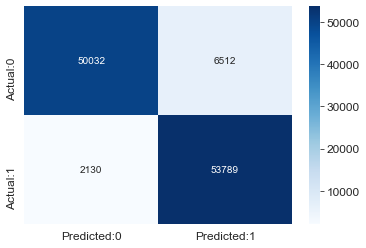

In [44]:
# plotting confusion matrix and printing classification report

rfc_cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred_rfc),
                     columns=['Predicted:0','Predicted:1'],
                     index=['Actual:0','Actual:1'])
sns.heatmap(rfc_cm, annot=True,fmt='d',cmap="Blues")
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     56544
           1       0.85      0.95      0.90     55919

    accuracy                           0.89    112463
   macro avg       0.90      0.89      0.89    112463
weighted avg       0.90      0.89      0.89    112463



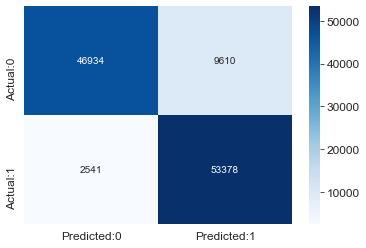

In [45]:
# plotting confusion matrix and printing classification report

dtc_cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred_dtc),
                     columns=['Predicted:0','Predicted:1'],
                     index=['Actual:0','Actual:1'])
sns.heatmap(dtc_cm, annot=True,fmt='d',cmap="Blues")
print(classification_report(y_test, y_pred_dtc))

From the above confusion matrices and classification reports we can say that Random Forest classifier performs well and we will be using it to predict the test data.

<AxesSubplot:>

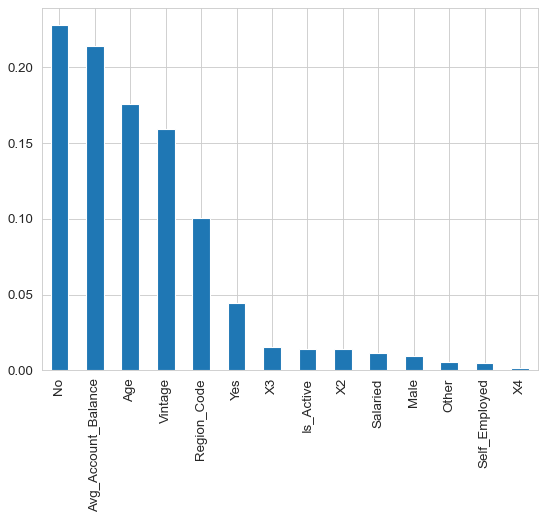

In [46]:
# checking important features

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rfc.feature_importances_, index=df_train.drop(df_train[['Is_Lead']], 
                                                                       axis=1).columns)
feat_importances.nlargest(30).plot(kind='bar')

In [47]:
# storing predictions into submission.csv

my_submission = pd.DataFrame({'ID': df_test.ID, 'Is_Lead': rfc.predict(df_test.drop(['ID'], axis=1))})
# choosing filename
my_submission.to_csv('submission.csv', index=False)